In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
print('All Imports done')

All Imports done


In [23]:
np.random.seed(0)

In [24]:
n_pts=500
centers=[[-1,1],[-1,-1],[1,-1]]
X, y=datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

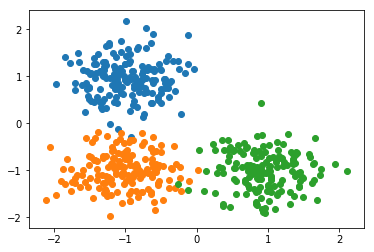

In [25]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [19]:
print(y)
y_cat=to_categorical(y,3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [26]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation=tf.nn.softmax))

model.compile(Adam(0.3), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
h=model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=10)

Epoch 1/10
500/500 [==============================] - 0s 54us/step - loss: 0.0249 - acc: 0.9900
Epoch 2/10
500/500 [==============================] - 0s 54us/step - loss: 0.0285 - acc: 0.9920
Epoch 3/10
500/500 [==============================] - 0s 46us/step - loss: 0.0286 - acc: 0.9900
Epoch 4/10
500/500 [==============================] - 0s 43us/step - loss: 0.0250 - acc: 0.9940
Epoch 5/10
500/500 [==============================] - 0s 44us/step - loss: 0.0258 - acc: 0.9900
Epoch 6/10
500/500 [==============================] - 0s 40us/step - loss: 0.0276 - acc: 0.9900
Epoch 7/10
500/500 [==============================] - 0s 42us/step - loss: 0.0265 - acc: 0.9900
Epoch 8/10
500/500 [==============================] - 0s 43us/step - loss: 0.0254 - acc: 0.9920
Epoch 9/10
500/500 [==============================] - 0s 43us/step - loss: 0.0256 - acc: 0.9900
Epoch 10/10
500/500 [==============================] - 0s 44us/step - loss: 0.0249 - acc: 0.9900


Text(0.5, 1.0, 'Accuracy')

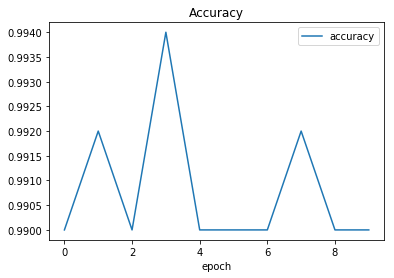

In [36]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('Accuracy')

In [37]:
def plot_descision_boundry(X, y_cat, model):
    x_span= np.linspace(min(X[:,0])-.25, max(X[:,0])+.25,50)
    y_span=np.linspace(min(X[:,1])-.25,max(X[:,1])+.25,50)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred_func=model.predict_classes(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

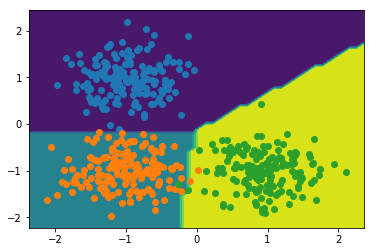

In [38]:
plot_descision_boundry(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])